Task 2 : Sales Performance Analysis Program

Loading data from: superstore_final_dataset (1).csv

Initial Data Overview:
Number of records: 9800
Number of columns: 18

First 5 rows:
   Row_ID        Order_ID  Order_Date   Ship_Date       Ship_Mode Customer_ID  \
0       1  CA-2017-152156   8/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156   8/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688   12/6/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer_Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3    Sean O Donnel   Co

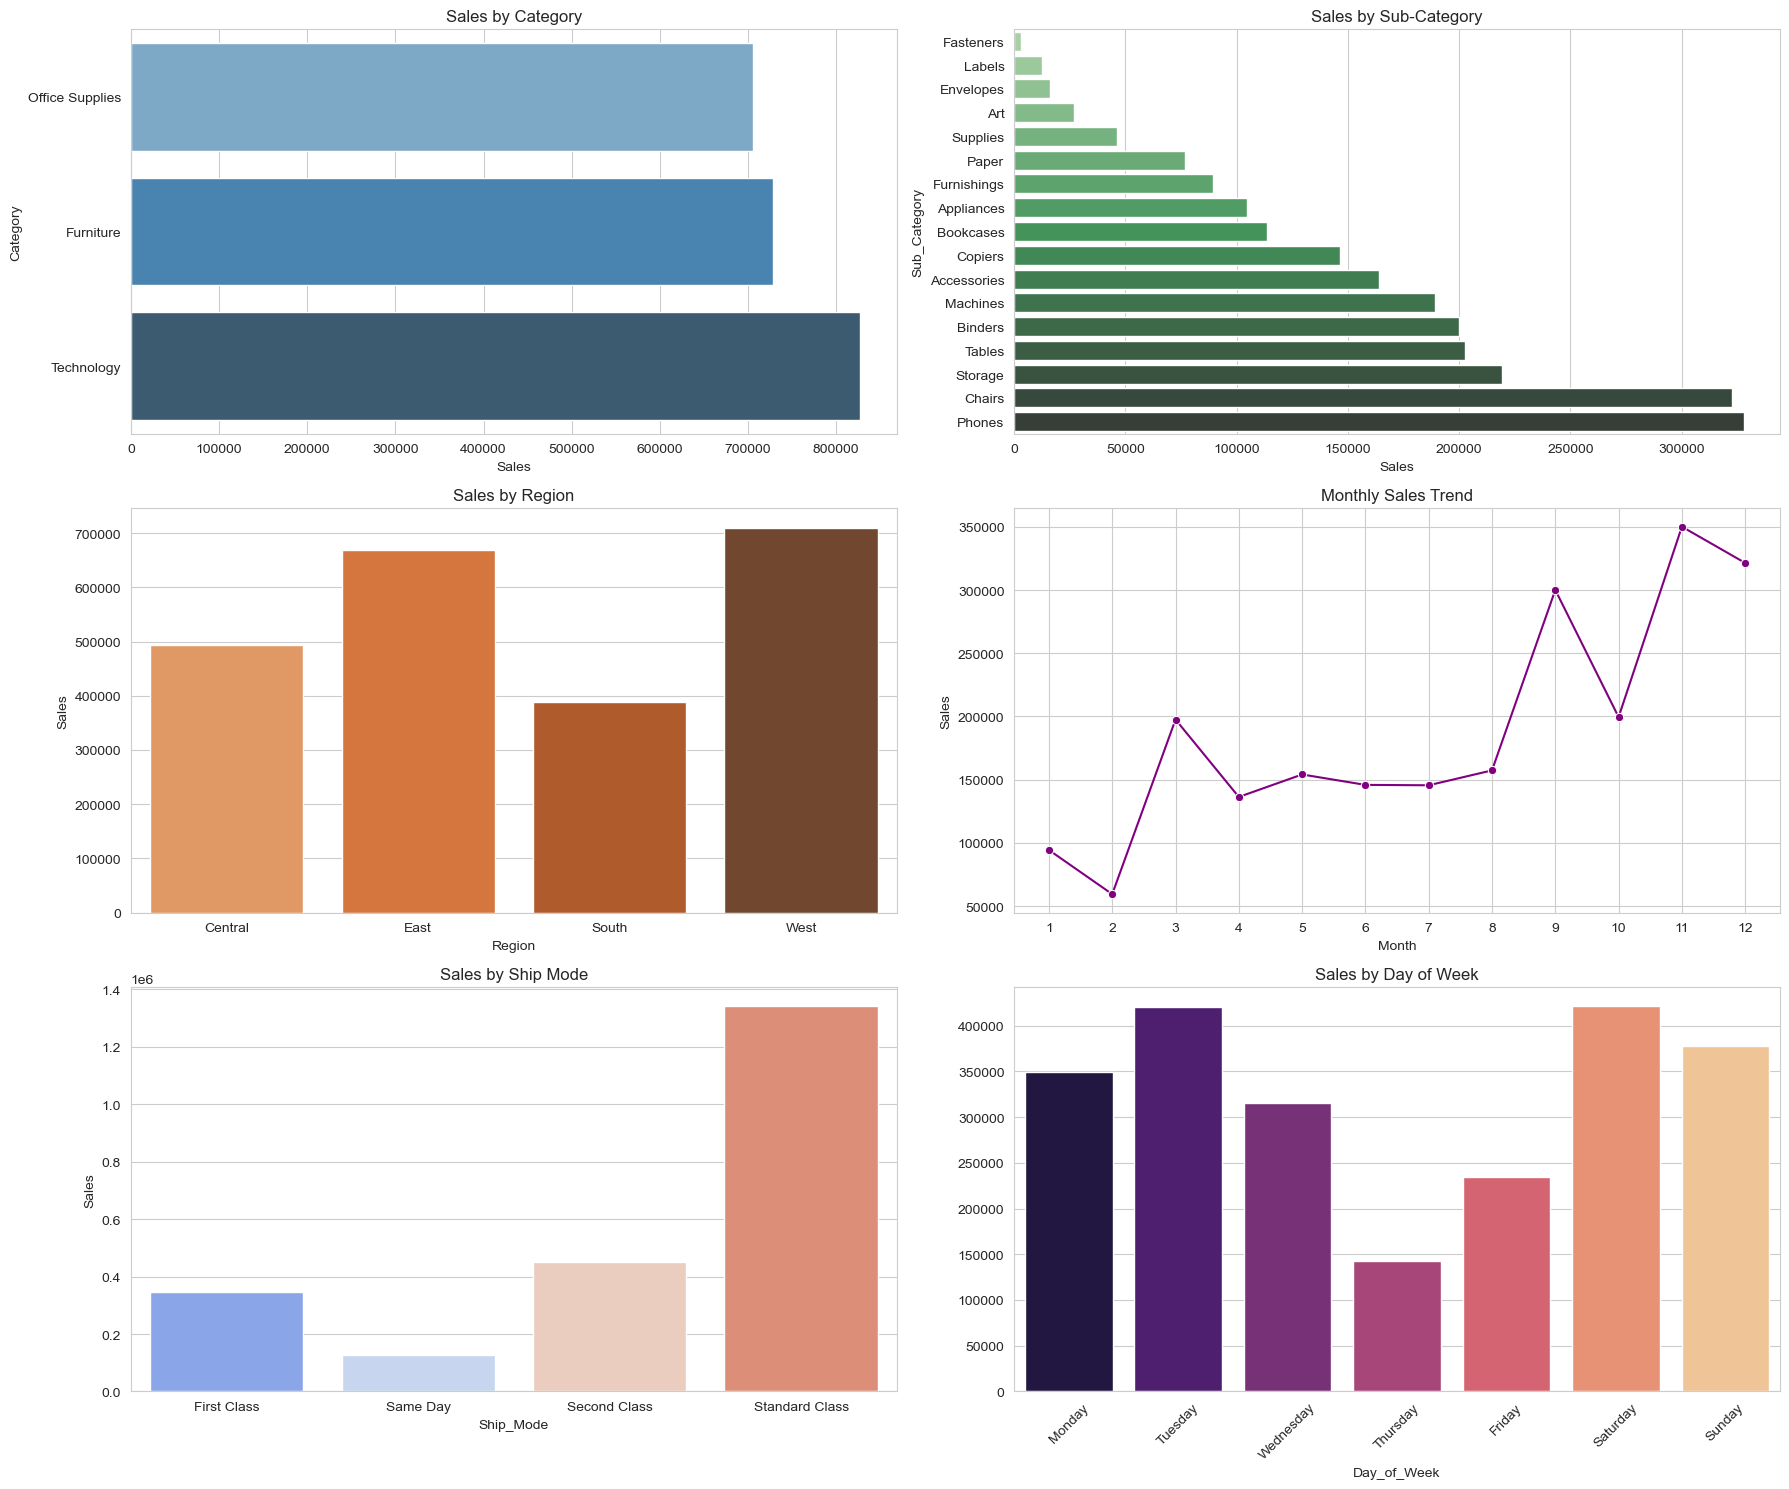


Analysis completed successfully!


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

def load_and_preprocess_data(filepath="superstore_final_dataset (1).csv"):
    try:

        df = pd.read_csv(filepath, encoding='ISO-8859-1')

        print("\nInitial Data Overview:")
        print("====================================")
        print(f"Number of records: {len(df)}")
        print(f"Number of columns: {len(df.columns)}")
        print("\nFirst 5 rows:")
        print(df.head())

        print("\nData Cleaning and Preprocessing:")
        print("====================================")
        print("\nMissing Values Before Cleaning:")
        print(df.isnull().sum())

        df['Order_Date'] = pd.to_datetime(df['Order_Date'], dayfirst=True, errors='coerce')
        df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], dayfirst=True, errors='coerce')

        df.dropna(subset=['Order_Date', 'Ship_Date'], inplace=True)

        print(f"\nNumber of duplicates: {df.duplicated().sum()}")
        df.drop_duplicates(inplace=True)

        df['Year'] = df['Order_Date'].dt.year
        df['Month'] = df['Order_Date'].dt.month
        df['Day'] = df['Order_Date'].dt.day
        df['Day_of_Week'] = df['Order_Date'].dt.day_name()
        df['Week_of_Year'] = df['Order_Date'].dt.isocalendar().week

        print("\nMissing Values After Cleaning:")
        print(df.isnull().sum())

        print("\nData Types:")
        print(df.dtypes)

        return df

    except Exception as e:
        print(f"\nError loading or processing data: {str(e)}")
        return None


def perform_eda(df):
    print("\nExploratory Data Analysis (EDA):")
    print("====================================")
    print("\nBasic Statistics:")
    print(df.describe(include='all'))

    print("\nSales by Category:")
    print(df.groupby('Category')['Sales'].sum().sort_values(ascending=False))

    print("\nSales by Sub-Category:")
    print(df.groupby('Sub_Category')['Sales'].sum().sort_values(ascending=False))

    print("\nSales by Region:")
    print(df.groupby('Region')['Sales'].sum().sort_values(ascending=False))

    print("\nSales by Ship Mode:")
    print(df.groupby('Ship_Mode')['Sales'].sum().sort_values(ascending=False))


def visualize_data(df):
    print("\nData Visualization:")
    print("====================================")
    sns.set_style("whitegrid")

    plt.figure(figsize=(18, 15))

    plt.subplot(3, 2, 1)
    cat_sales = df.groupby('Category')['Sales'].sum().sort_values()
    sns.barplot(x=cat_sales.values, y=cat_sales.index, palette='Blues_d')
    plt.title("Sales by Category")
    plt.xlabel("Sales")

    plt.subplot(3, 2, 2)
    subcat_sales = df.groupby('Sub_Category')['Sales'].sum().sort_values()
    sns.barplot(x=subcat_sales.values, y=subcat_sales.index, palette='Greens_d')
    plt.title("Sales by Sub-Category")
    plt.xlabel("Sales")

    plt.subplot(3, 2, 3)
    region_sales = df.groupby('Region')['Sales'].sum()
    sns.barplot(x=region_sales.index, y=region_sales.values, palette='Oranges_d')
    plt.title("Sales by Region")
    plt.ylabel("Sales")

    plt.subplot(3, 2, 4)
    month_sales = df.groupby('Month')['Sales'].sum()
    sns.lineplot(x=month_sales.index, y=month_sales.values, marker='o', color='purple')
    plt.title("Monthly Sales Trend")
    plt.xlabel("Month")
    plt.ylabel("Sales")
    plt.xticks(range(1, 13))

    plt.subplot(3, 2, 5)
    ship_mode_sales = df.groupby('Ship_Mode')['Sales'].sum()
    sns.barplot(x=ship_mode_sales.index, y=ship_mode_sales.values, palette='coolwarm')
    plt.title("Sales by Ship Mode")
    plt.ylabel("Sales")

    plt.subplot(3, 2, 6)
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    day_sales = df.groupby('Day_of_Week')['Sales'].sum().reindex(day_order)
    sns.barplot(x=day_sales.index, y=day_sales.values, palette="magma")
    plt.title("Sales by Day of Week")
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


def main():
    print("Task 2 : Sales Performance Analysis Program")
    print("====================================\n")
    filepath = "superstore_final_dataset (1).csv"

    if not os.path.exists(filepath):
        print(f"Error: File '{filepath}' not found in the current directory.")
        print("Please make sure the file exists or provide the full path.")
        return

    print(f"Loading data from: {filepath}")
    df = load_and_preprocess_data(filepath)

    if df is not None:
        perform_eda(df)
        visualize_data(df)
        print("\nAnalysis completed successfully!")
    else:
        print("Failed to complete analysis due to data loading issues.")


if __name__ == "__main__":
    main()
